In [1]:
#本章需导入的模块
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split,KFold
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import svm
import os

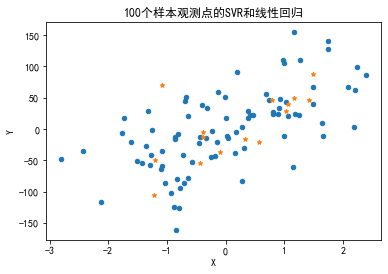

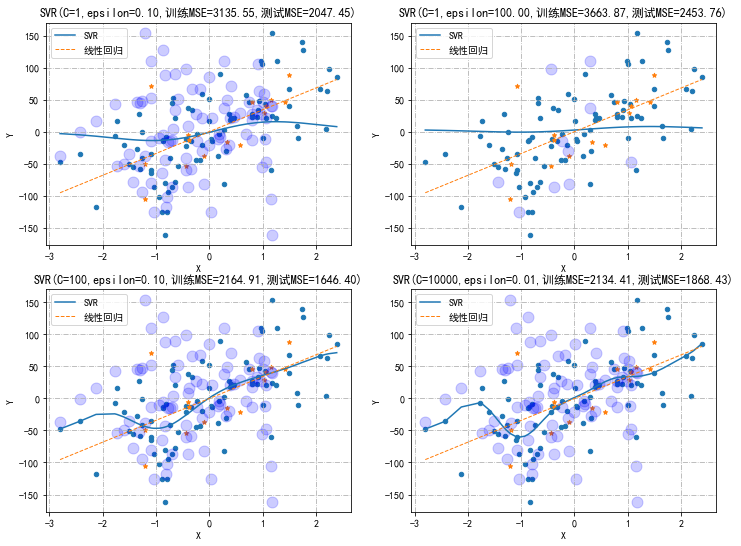

In [2]:
N=100
X,Y=make_regression(n_samples=N,n_features=1,random_state=123,noise=50,bias=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=123)
plt.scatter(X_train,Y_train,s=20)
plt.scatter(X_test,Y_test,s=20,marker='*')
plt.title("100个样本观测点的SVR和线性回归")
plt.xlabel("X")
plt.ylabel("Y")
        
modelLM=LM.LinearRegression()
modelLM.fit(X_train,Y_train)
X[:,0].sort()
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,9))
for C,E,H,L in [(1,0.1,0,0),(1,100,0,1),(100,0.1,1,0),(10000,0.01,1,1)]:
    modelSVR=svm.SVR(C=C,epsilon=E)
    modelSVR.fit(X_train,Y_train)
    axes[H,L].scatter(X_train,Y_train,s=20)
    axes[H,L].scatter(X_test,Y_test,s=20,marker='*')    
    axes[H,L].scatter(X[modelSVR.support_],Y[modelSVR.support_],marker='o',c='b',s=120,alpha=0.2)
    axes[H,L].plot(X,modelSVR.predict(X),linestyle='-',label="SVR")
    axes[H,L].plot(X,modelLM.predict(X),linestyle='--',label="线性回归",linewidth=1)
    axes[H,L].legend()
    ytrain=modelSVR.predict(X_train)
    ytest=modelSVR.predict(X_test)
    axes[H,L].set_title("SVR(C=%d,epsilon=%.2f,训练MSE=%.2f,测试MSE=%.2f)"%(C,E,mean_squared_error(Y_train,ytrain),
                                                                       mean_squared_error(Y_test,ytest)))
    axes[H,L].set_xlabel("X")
    axes[H,L].set_ylabel("Y")
    axes[H,L].grid(True,linestyle='-.')



代码说明：
（1）第10，11行：建立一般线性回归模型，拟合训练集数据。
（2）第14至29行：利用for循环分别建立四个支持向量回归机。
支持向量回归机的惩罚C依次取1,1,100,10000，对错误的惩罚越来越大。同时参数ε依次取0.1,100,0,1,0.01支持，规定了多个误差上限。拟合训练集数据。绘制样本观测点的散点图。标识出支持向量。绘制一般支持向量回归机的回归线和一般线性回归模型的回归线。计算训练误差和测试误差（MSE）。
